In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/Collab DataSets/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


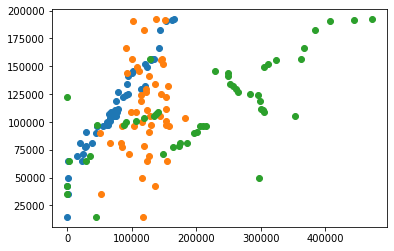

In [6]:
plt.scatter(dataset["R&D Spend"],dataset["Profit"])
plt.scatter(dataset["Administration"],dataset["Profit"])
plt.scatter(dataset["Marketing Spend"],dataset["Profit"])

In [7]:
x = dataset[["R&D Spend","Administration", "Marketing Spend","State"]].values
y = dataset[["Profit"]].values

In [8]:
st = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder="passthrough")
x = st.fit_transform(x)


In [9]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_predict = model.predict(x_test)

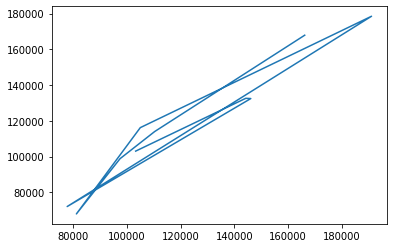

In [12]:
plt.plot(y_test, y_predict)

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
X = df.drop(["Profit"], axis = 1).values
Y = df[["Profit"]].values

In [15]:
ctd = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = "passthrough")
X = ctd.fit_transform(X)

In [16]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

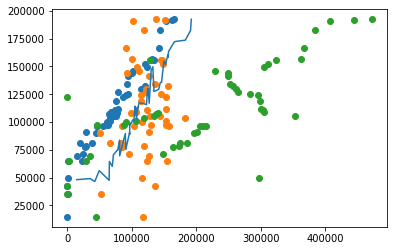

In [17]:
plt.scatter(dataset["R&D Spend"],dataset["Profit"])
plt.scatter(dataset["Administration"],dataset["Profit"])
plt.scatter(dataset["Marketing Spend"],dataset["Profit"])
plt.plot(Y, model.predict(X))

In [18]:
mse = mean_squared_error(Y , model.predict(X) )


In [19]:
print(math.sqrt(mse))

8854.761029414494
